In [1]:
import numpy as np
import pandas as pd
from statistics import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataset
#df = pd.read_csv("final.csv")


from pandas import read_excel
my_sheet = 'final' 
file_name = 'final.xlsx' 
df = read_excel(file_name, sheet_name = my_sheet)
print(df.head()) 

    team result      margin   br  toss  bat    opposition      ground  date  \
0  India   lost   4 wickets   23  lost  NaN       England       Leeds  1974   
1  India   lost   6 wickets   37   won  1st       England    The Oval  1974   
2  India   lost    202 runs  NaN  lost  2nd       England      Lord's  1975   
3  India    won  10 wickets  181  lost  2nd  South Africa       Leeds  1975   
4  India   lost   4 wickets    7   won  1st   New Zealand  Manchester  1975   

                                                 url scrapped_date  
0  https://stats.espncricinfo.com/ci/engine/stats...    2021-02-05  
1  https://stats.espncricinfo.com/ci/engine/stats...    2021-02-05  
2  https://stats.espncricinfo.com/ci/engine/stats...    2021-02-05  
3  https://stats.espncricinfo.com/ci/engine/stats...    2021-02-05  
4  https://stats.espncricinfo.com/ci/engine/stats...    2021-02-05  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   team           984 non-null    object        
 1   result         928 non-null    object        
 2   margin         927 non-null    object        
 3   br             504 non-null    object        
 4   toss           871 non-null    object        
 5   bat            756 non-null    object        
 6   opposition     984 non-null    object        
 7   ground         984 non-null    object        
 8   date           984 non-null    int64         
 9   url            984 non-null    object        
 10  scrapped_date  984 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 84.7+ KB


In [5]:
df.head()

,team,result,margin,br,toss,bat,opposition,ground,date,url,scrapped_date
0,India,lost,4 wickets,23,lost,NaN,England,Leeds,1974,https://stats.espncricinfo.com/ci/engine/stats...,2021-02-05
1,India,lost,6 wickets,37,won,1st,England,The Oval,1974,https://stats.espncricinfo.com/ci/engine/stats...,2021-02-05
2,India,lost,202 runs,NaN,lost,2nd,England,Lord's,1975,https://stats.espncricinfo.com/ci/engine/stats...,2021-02-05
3,India,won,10 wickets,181,lost,2nd,South Africa,Leeds,1975,https://stats.espncricinfo.com/ci/engine/stats...,2021-02-05
4,India,lost,4 wickets,7,won,1st,New Zealand,Manchester,1975,https://stats.espncricinfo.com/ci/engine/stats...,2021-02-05


In [6]:
#Summary of N/A Value
df.isnull().sum()

team               0
result            56
margin            57
br               480
toss             113
bat              228
opposition         0
ground             0
date               0
url                0
scrapped_date      0
dtype: int64

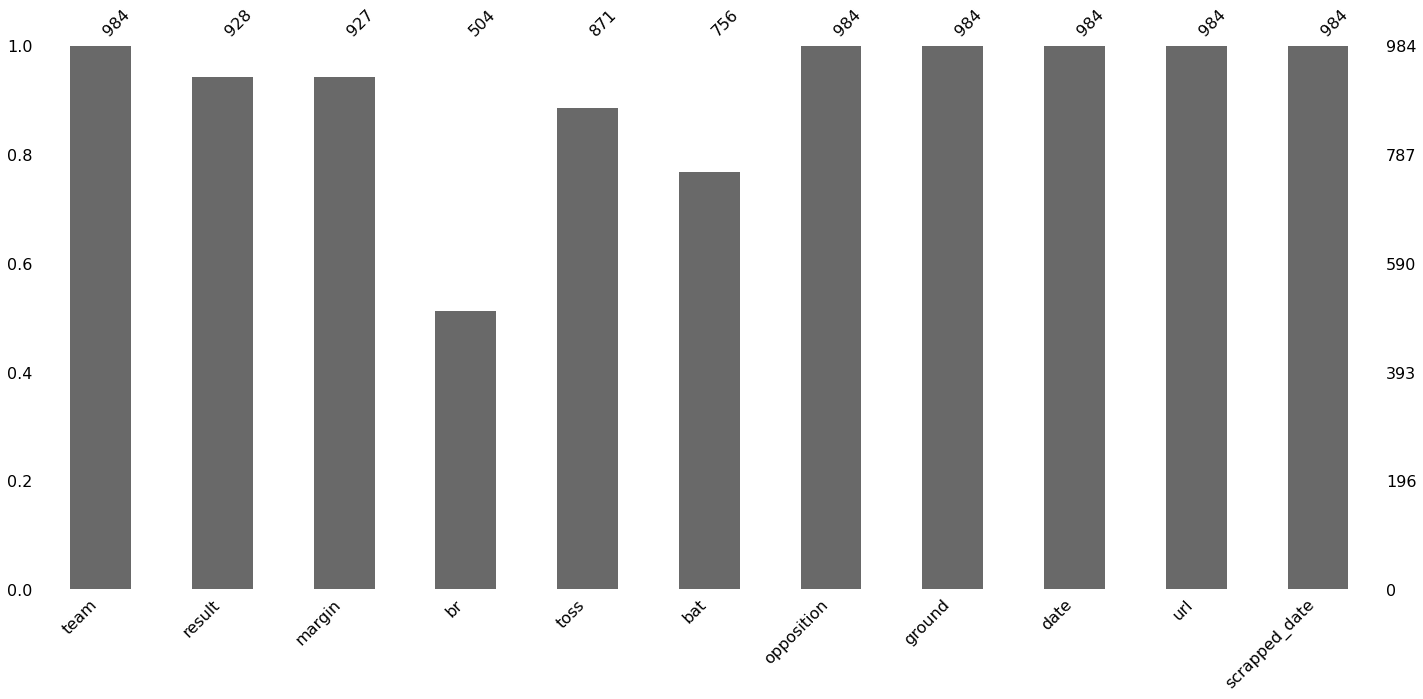

In [7]:
import missingno as msno
msno.bar(df);

In [12]:
df = df.fillna(df.mean())
print(df)

      team result      margin   br  toss  bat    opposition      ground  date  \
0    India   lost   4 wickets   23  lost  NaN       England       Leeds  1974   
1    India   lost   6 wickets   37   won  1st       England    The Oval  1974   
2    India   lost    202 runs  NaN  lost  2nd       England      Lord's  1975   
3    India    won  10 wickets  181  lost  2nd  South Africa       Leeds  1975   
4    India   lost   4 wickets    7   won  1st   New Zealand  Manchester  1975   
..     ...    ...         ...  ...   ...  ...           ...         ...   ...   
979  India    NaN         NaN  NaN   NaN    v  South Africa     Lucknow  2020   
980  India    NaN         NaN  NaN   NaN    v  South Africa     Kolkata  2020   
981  India   lost     66 runs  NaN  lost  2nd     Australia      Sydney  2020   
982  India   lost     51 runs  NaN  lost  2nd     Australia      Sydney  2020   
983  India    won     13 runs  NaN   won  1st     Australia    Canberra  2020   

                           

C:\Users\19055\Anaconda3\envs\aidi-1100\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


In [13]:
df = df['br'].fillna(median)

In [15]:
#Summary of N/A Value
df.isnull().sum()

0

In [14]:
df.head()

0                                         23
1                                         37
2    <function median at 0x000001BB743C2EE8>
3                                        181
4                                          7
Name: br, dtype: object